# Hawkes Processes

## Statistics plots (Cluster size and duration probability distribution)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from funciones import *

In [2]:
def algorithm(rate, mu, n):
    """
    Algorithm that computes interevent times and Hawkes intensity

    #Output: rate x_k, x_k
    """                                    
    # Paso 1
    u1 = np.random.uniform()
    if mu == 0:
        F1 = np.inf
    else:
        F1 = -np.log(u1) / mu

    # Paso 2
    u2 = np.random.uniform()
    if (rate - mu) == 0:
        G2 = 0
    else:
        G2 = 1 + np.log(u2) / (rate - mu)
        

    # Paso 3
    if G2 <= 0:
        F2 = np.inf
    else:
        F2 = -np.log(G2)

    # Paso 4
    xk = min(F1, F2)

    # Paso 5
    rate_tk = (rate - mu) * np.exp(-xk) + n + mu
    return rate_tk, xk 

In [3]:
def generate_series(K, n, mu):
    """
    Generates temporal series for K Hawkes processes
    
    ##Inputs:
    K: Number of events
    n: Strength of the Hawkes process
    mu: Background intensity 

    ##Output:
    times: time series the events
    rate: time series for the intensity
    """
    times_between_events = [0]
    rate = [mu]
    for _ in range(K):
        rate_tk, xk = algorithm(rate[-1], mu, n)
        rate.append(rate_tk)
        times_between_events.append(xk)
    times = np.cumsum(times_between_events)
    return times, rate

In [4]:
def identify_clusters(times, delta):
    """
    Identifies clusters in a temporal series given a resolution parameter delta
    
    ## Inputs:
    times: temporal series
    delta: resolution parameter

    ## Output:
    clusters: list of clusters
    """
    clusters = []
    current_cluster = []
    for i in range(len(times) - 1):
        if times[i + 1] - times[i] <= delta:
            if not current_cluster:
                current_cluster.append(times[i])
            current_cluster.append(times[i + 1])
        else:
            if current_cluster:
                clusters.append(current_cluster)
                current_cluster = []
    return clusters

For $\mu = 10^{-4}$,     $\Delta_1^*=\dfrac{log(K)}{\mu+\sqrt{2\mu K}}$

In [6]:
K = 10**4
n = 1
mu = 10**-4

times, rate = generate_series(K, n, mu)

# $K = 10^6$ events
$n=1$, $\mu=10^{-4}$

In [7]:
K = 10**4
n = 1
mu = 10**-4

times, rate = generate_series(K, n, mu)

In [8]:
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))

deltas = [delta1, delta1*10]

clusters = identify_clusters(times, delta1)

print(f'Número de clusters para K={K:.0E}, n={n}, mu={mu}, $Delta={delta1}$: {len(clusters)} ')

cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

Número de clusters para K=1E+04, n=1, mu=0.0001, $Delta=6.512233649603157$: 104 


$\Delta = \Delta_1^*$

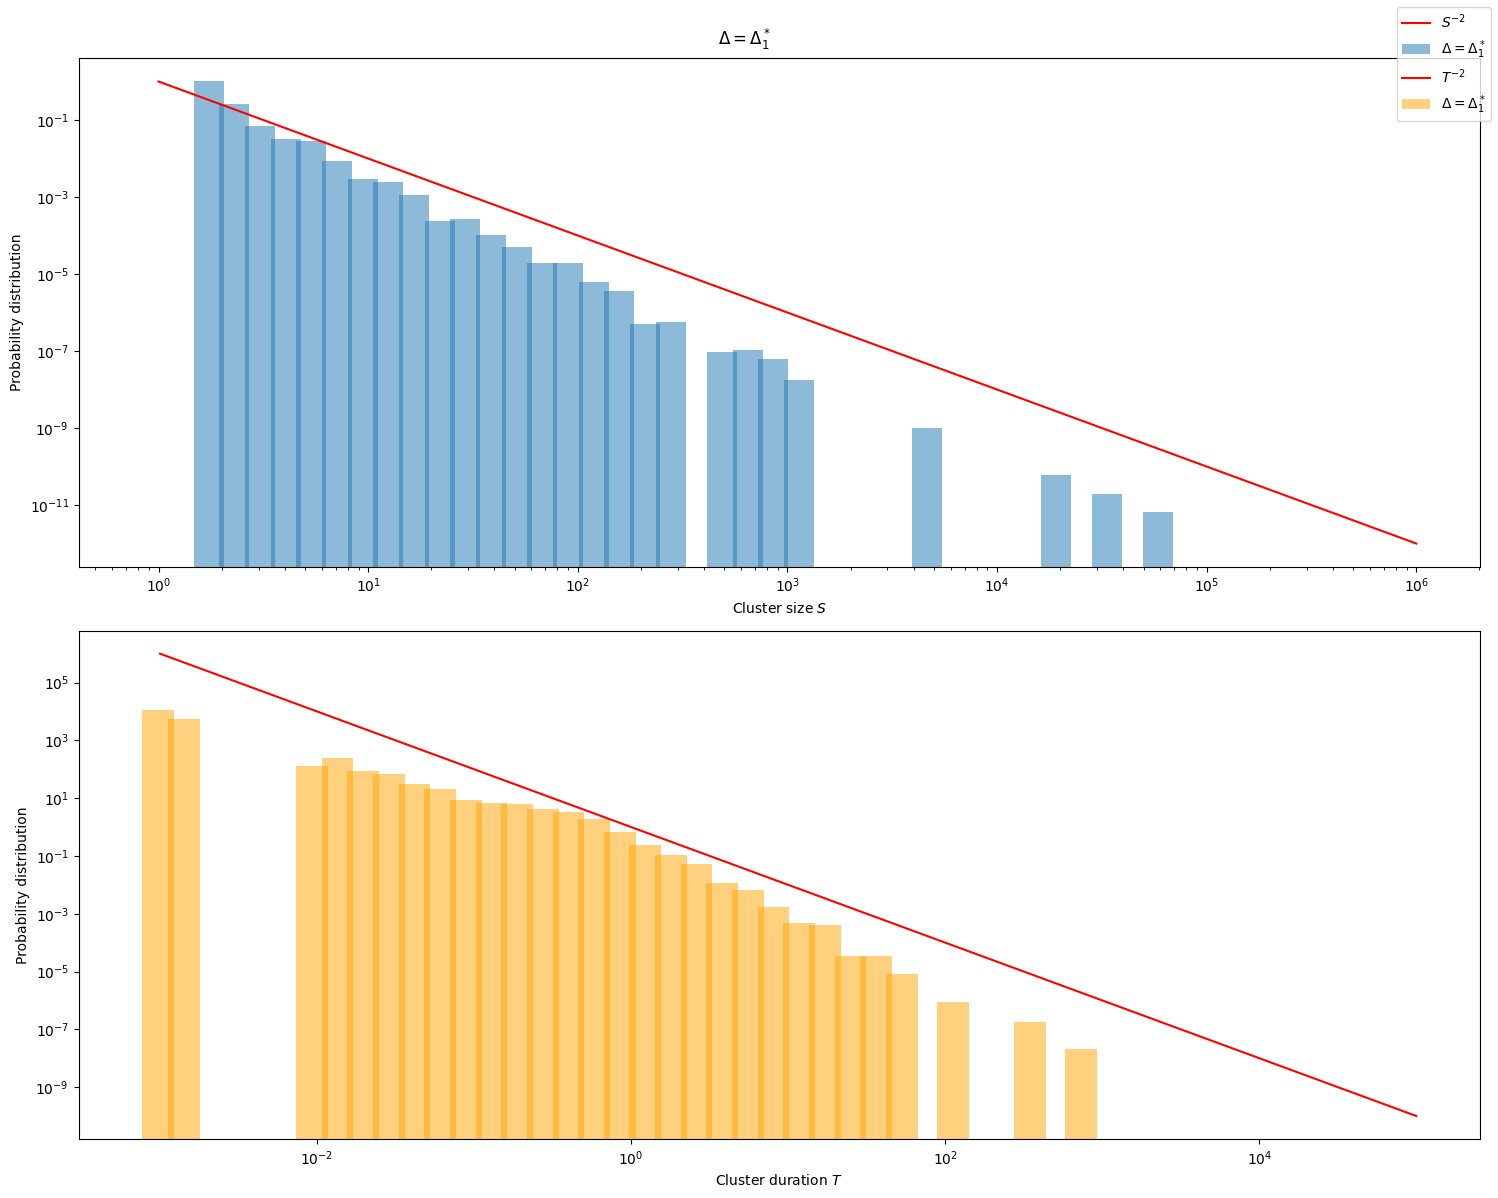

In [24]:
s_bins = np.logspace(0, 6, num = 50, base = 10)
y = s_bins**-2
s_widths = (s_bins[1:] - s_bins[:-1])
hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
hist_norm = hist[0]/s_widths


fig = plt.figure(figsize=(15, 12))
axgrid = fig.add_gridspec(2,1)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.bar(s_bins[:-1], hist_norm, s_widths, label='$\Delta=\Delta_1^*$', alpha = 0.5)
ax0.plot(s_bins, y, label='$S^{-2}$', color='red')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')


t_bins = np.logspace(-3, 5, num = 50, base = 10)
y = t_bins**-2
widths = (t_bins[1:] - t_bins[:-1])
hist = np.histogram(cluster_times, bins=t_bins, density = True)
hist_norm = hist[0]/widths

ax1 = fig.add_subplot(axgrid[1,0])
ax1.bar(t_bins[:-1], hist_norm, widths, label='$\Delta=\Delta_1^*$', color='orange', alpha = 0.5)
ax1.plot(t_bins, y, label='$T^{-2}$', color='red')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')

fig.legend()
fig.suptitle('$\Delta=\Delta_1^*$')
fig.tight_layout()


$\Delta = 10 \Delta_1^*$

In [25]:
clusters = identify_clusters(times, 10*delta1)

print(f'Número de clusters para K={K:.0E}, n={n}, mu={mu:.0E}, $Delta={10*delta1:2.E}$: {len(clusters)} ')

cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

Número de clusters para K=1E+06, n=1, mu=0.0001, $Delta=9.76897212402654$: 232 


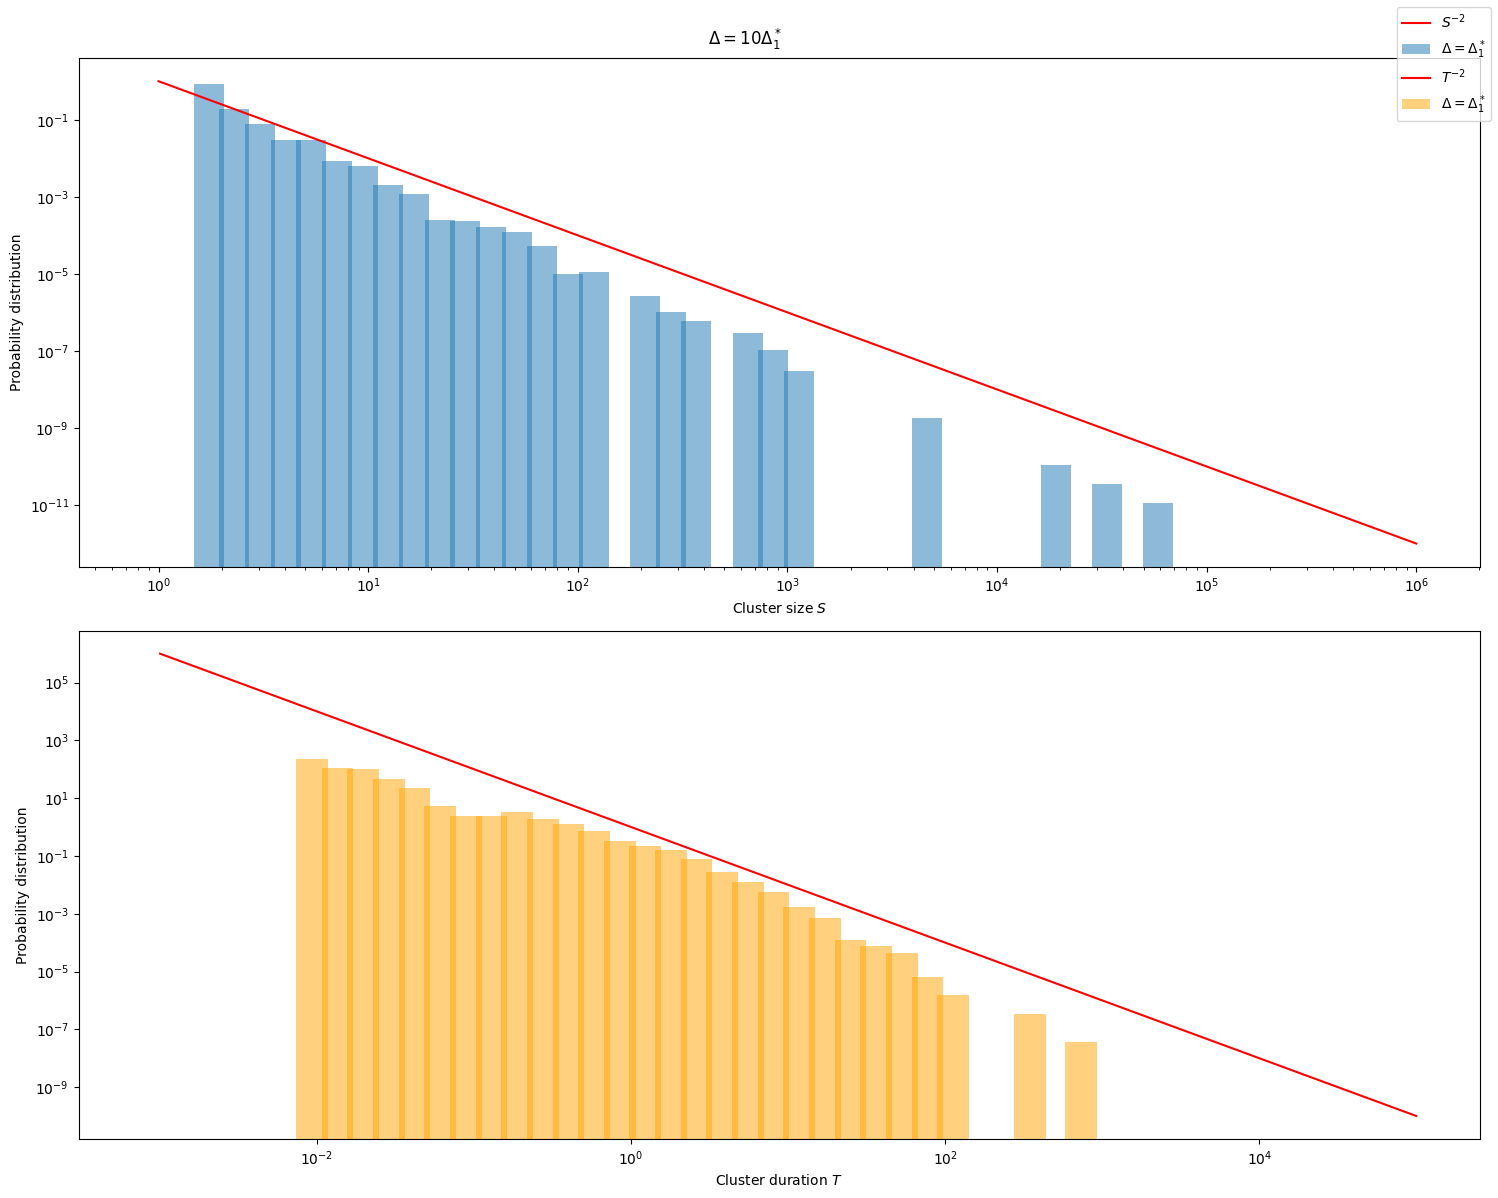

In [26]:
s_bins = np.logspace(0, 6, num = 50, base = 10)
y = s_bins**-2
s_widths = (s_bins[1:] - s_bins[:-1])
hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
hist_norm = hist[0]/s_widths


fig = plt.figure(figsize=(15, 12))
axgrid = fig.add_gridspec(2,1)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.bar(s_bins[:-1], hist_norm, s_widths, label='$\Delta=\Delta_1^*$', alpha = 0.5)
ax0.plot(s_bins, y, label='$S^{-2}$', color='red')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')


t_bins = np.logspace(-3, 5, num = 50, base = 10)
y = t_bins**-2
widths = (t_bins[1:] - t_bins[:-1])
hist = np.histogram(cluster_times, bins=t_bins, density = True)
hist_norm = hist[0]/widths

ax1 = fig.add_subplot(axgrid[1,0])
ax1.bar(t_bins[:-1], hist_norm, widths, label='$\Delta=\Delta_1^*$', color='orange', alpha = 0.5)
ax1.plot(t_bins, y, label='$T^{-2}$', color='red')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')

fig.legend()
fig.suptitle('$\Delta=10\Delta_1^*$')
fig.tight_layout()


## Scatter plot

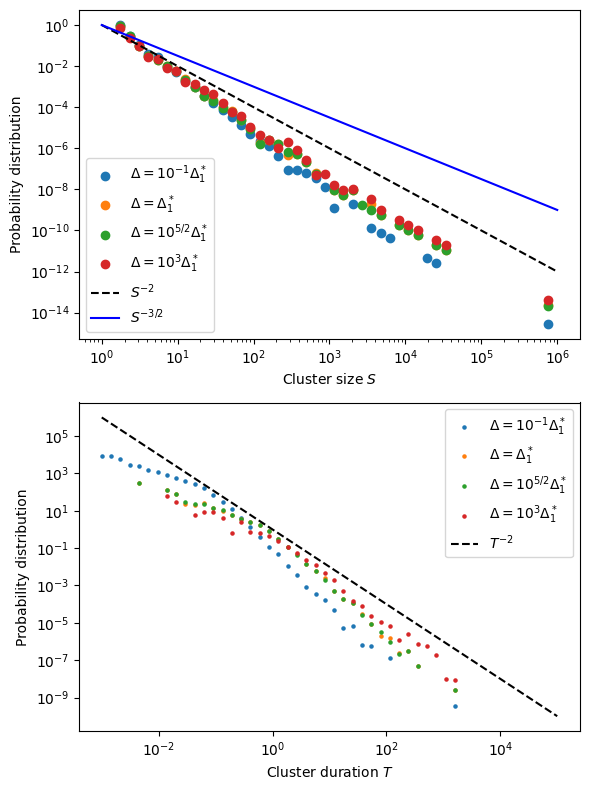

In [14]:
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))
deltas = [delta1*0.1, delta1, delta1**(5/2), delta1*1000]
labels = ['$\Delta=10^{-1}\Delta_1^*$','$\Delta=\Delta_1^*$','$\Delta=10^{5/2}\Delta_1^*$', '$\Delta=10^3\Delta_1^*$']

fig = plt.figure(figsize=(6, 8))
axgrid = fig.add_gridspec(2,1)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[1,0])

for i in range(len(deltas)):
    clusters = identify_clusters(times, deltas[i])

    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

    s_bins = np.logspace(0, 6, num = 50, base = 10)
    s_widths = (s_bins[1:] - s_bins[:-1])
    s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
    s_hist_norm = s_hist[0]/s_widths

    
    ax0.scatter(s_bins[:-1], s_hist_norm, label=labels[i])
    ax0.set_xscale('log')
    ax0.set_yscale('log')
    ax0.set_xlabel('Cluster size $S$')
    ax0.set_ylabel('Probability distribution')


    t_bins = np.logspace(-3, 5, num = 50, base = 10)
    t_widths = (t_bins[1:] - t_bins[:-1])
    t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
    t_hist_norm = t_hist[0]/t_widths

    ax1.scatter(t_bins[:-1], t_hist_norm, label=labels[i], s=5)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel('Cluster duration $T$')
    ax1.set_ylabel('Probability distribution')

    
x_s = np.logspace(0, 6, num = 50, base = 10)
y_s = x_s**-2
y_s2 = x_s**(-3/2)
x_t = np.logspace(-3, 5, num = 50, base = 10)
y_t = x_t**-2

ax0.plot(x_s, y_s, label='$S^{-2}$', color='black', linestyle='--')
ax0.plot(x_s, y_s2, label='$S^{-3/2}$', color='blue')
ax1.plot(x_t, y_t, label='$T^{-2}$', color='black', linestyle='--')
ax0.legend()
ax1.legend()
fig.tight_layout()

# $K = 10^7$ events
$n=1$, $\mu=10^{-4}$

In [10]:
K = 10**7
n = 1
mu = 10**-4

times, rate = generate_series(K, n, mu)

In [29]:
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))

deltas = [delta1, delta1*10]

clusters = identify_clusters(times, delta1)

print(f'Número de clusters para K={K:.0E}, n={n}, mu={mu:.0E}, $Delta={delta1:.2E}$: {len(clusters)} ')

cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

Número de clusters para K=1E+07, n=1, mu=1E-04, $Delta=3.60E-01$: 12006 


$\Delta = \Delta_1^*$

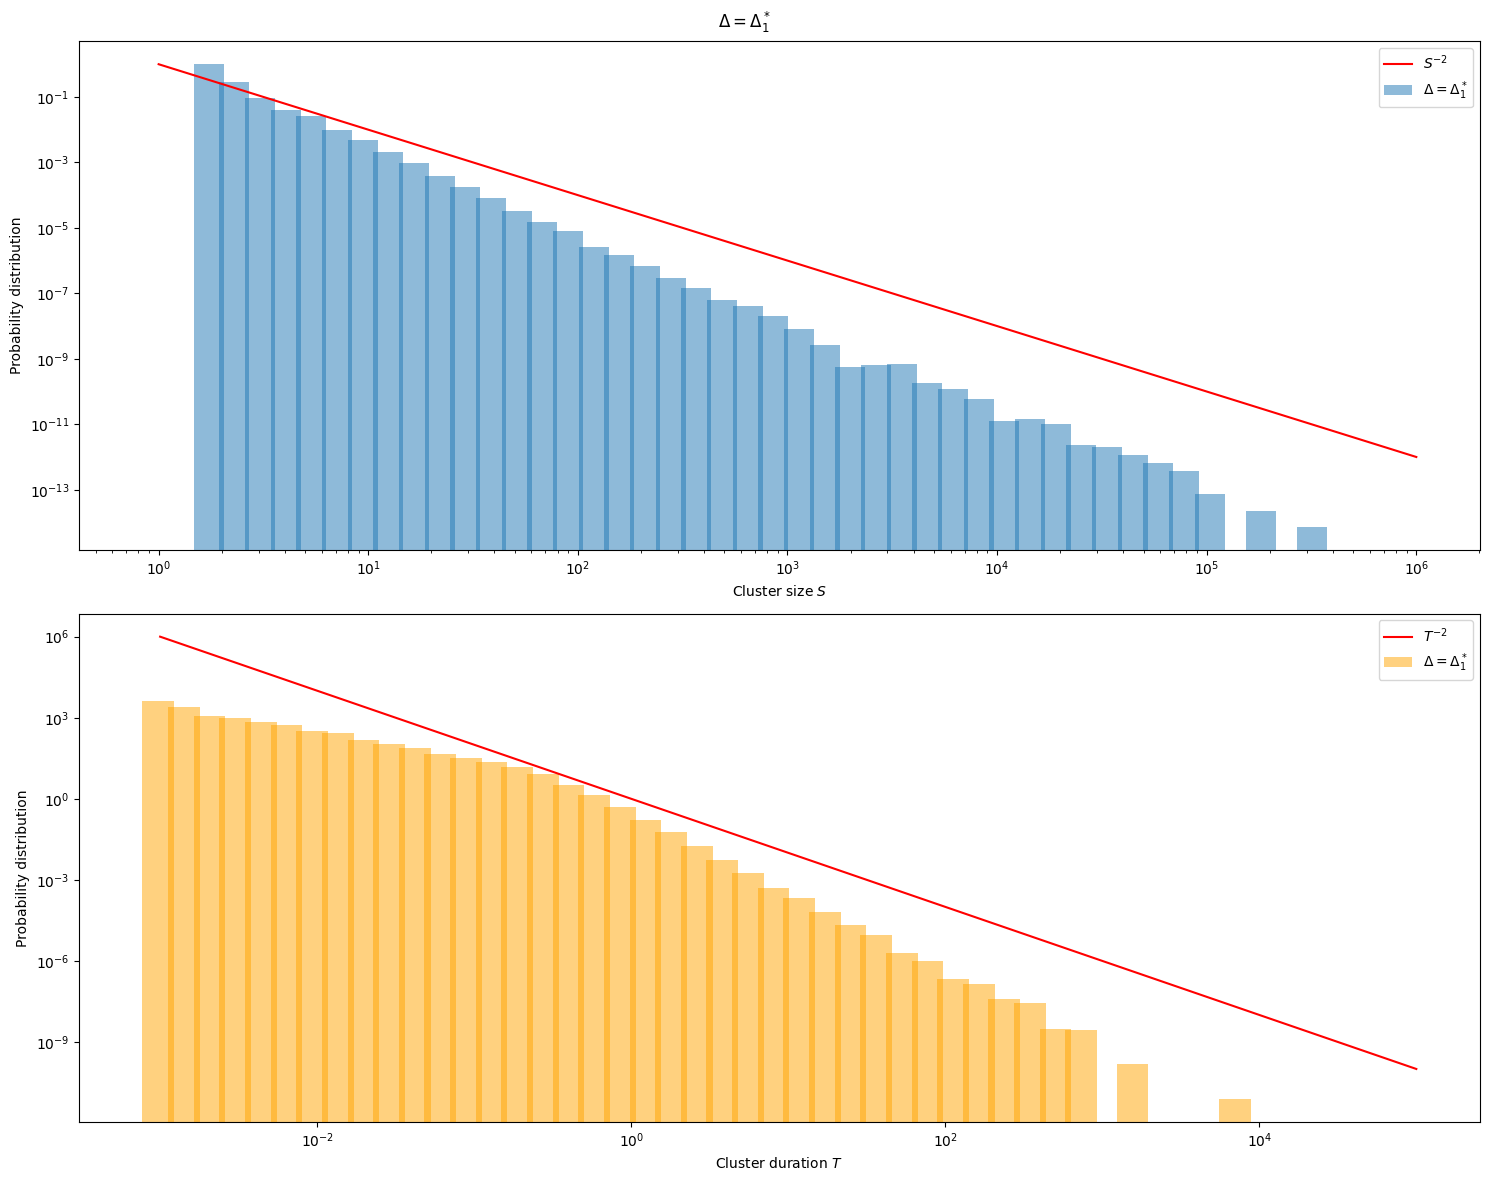

In [30]:
s_bins = np.logspace(0, 6, num = 50, base = 10)
y = s_bins**-2
s_widths = (s_bins[1:] - s_bins[:-1])
hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
hist_norm = hist[0]/s_widths


fig = plt.figure(figsize=(15, 12))
axgrid = fig.add_gridspec(2,1)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.bar(s_bins[:-1], hist_norm, s_widths, label='$\Delta=\Delta_1^*$', alpha = 0.5)
ax0.plot(s_bins, y, label='$S^{-2}$', color='red')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')


t_bins = np.logspace(-3, 5, num = 50, base = 10)
y = t_bins**-2
widths = (t_bins[1:] - t_bins[:-1])
hist = np.histogram(cluster_times, bins=t_bins, density = True)
hist_norm = hist[0]/widths

ax1 = fig.add_subplot(axgrid[1,0])
ax1.bar(t_bins[:-1], hist_norm, widths, label='$\Delta=\Delta_1^*$', color='orange', alpha = 0.5)
ax1.plot(t_bins, y, label='$T^{-2}$', color='red')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')

ax0.legend()
ax1.legend()
fig.suptitle('$\Delta=\Delta_1^*$')
fig.tight_layout()

$\Delta=10\Delta_1^*$

In [31]:
clusters = identify_clusters(times, 10*delta1)

print(f'Número de clusters para K={K:.0E}, n={n}, mu={mu:.0E}, $Delta={delta1:.2E}$: {len(clusters)} ')

cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

Número de clusters para K=1E+07, n=1, mu=1E-04, $Delta=3.60E-01$: 2863 


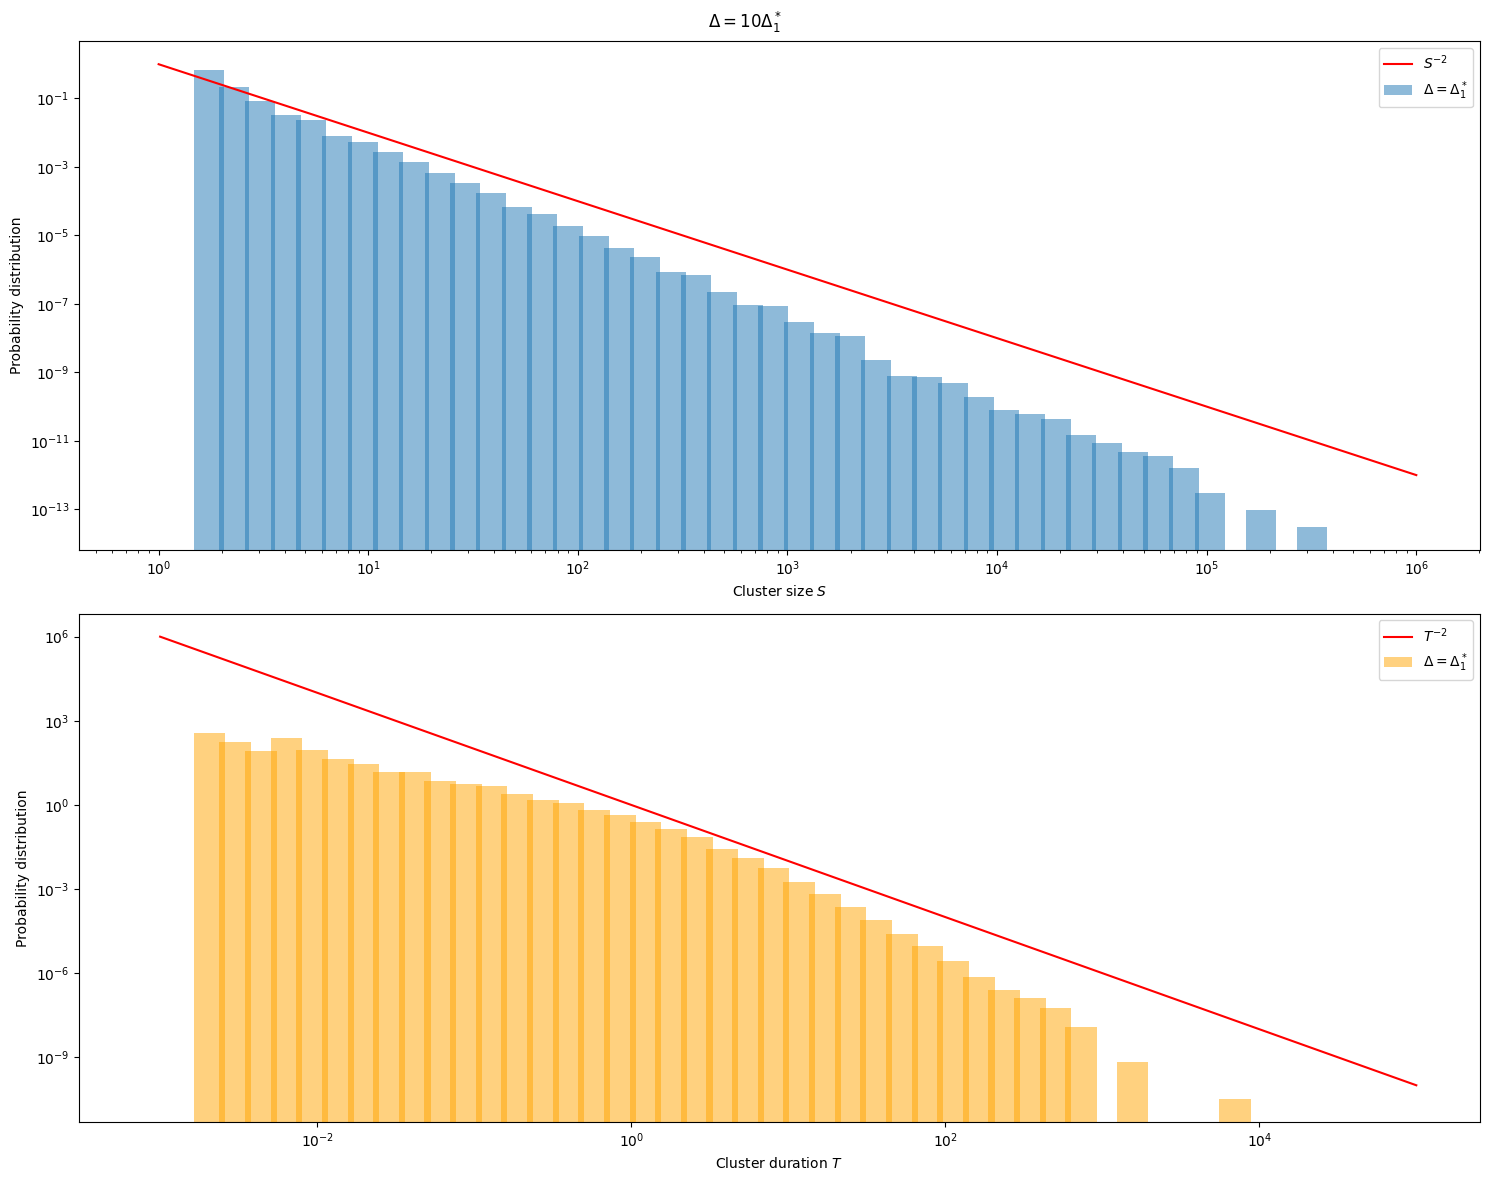

In [32]:
s_bins = np.logspace(0, 6, num = 50, base = 10)
y = s_bins**-2
s_widths = (s_bins[1:] - s_bins[:-1])
hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
hist_norm = hist[0]/s_widths


fig = plt.figure(figsize=(15, 12))
axgrid = fig.add_gridspec(2,1)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.bar(s_bins[:-1], hist_norm, s_widths, label='$\Delta=\Delta_1^*$', alpha = 0.5)
ax0.plot(s_bins, y, label='$S^{-2}$', color='red')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')


t_bins = np.logspace(-3, 5, num = 50, base = 10)
y = t_bins**-2
widths = (t_bins[1:] - t_bins[:-1])
hist = np.histogram(cluster_times, bins=t_bins, density = True)
hist_norm = hist[0]/widths

ax1 = fig.add_subplot(axgrid[1,0])
ax1.bar(t_bins[:-1], hist_norm, widths, label='$\Delta=\Delta_1^*$', color='orange', alpha = 0.5)
ax1.plot(t_bins, y, label='$T^{-2}$', color='red')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')

ax0.legend()
ax1.legend()
fig.suptitle('$\Delta=10\Delta_1^*$')
fig.tight_layout()


## Scatter plot

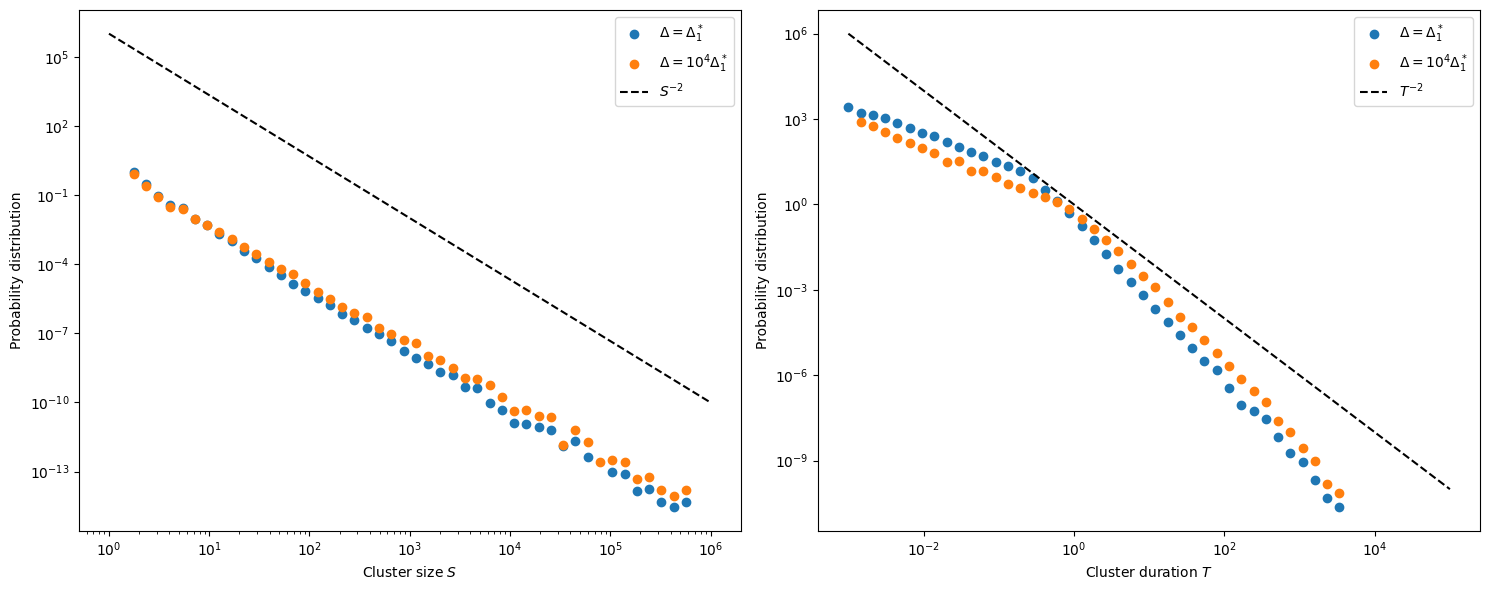

In [15]:
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))
deltas = [delta1, 10**4*delta1]
labels = ['$\Delta=\Delta_1^*$', '$\Delta=10^4\Delta_1^*$']

fig = plt.figure(figsize=(15, 6))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

for i in range(len(deltas)):
    clusters = identify_clusters(times, deltas[i])

    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

    s_bins = np.logspace(0, 6, num = 50, base = 10)
    y = s_bins**-2
    s_widths = (s_bins[1:] - s_bins[:-1])
    s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
    s_hist_norm = s_hist[0]/s_widths

    
    ax0.scatter(s_bins[:-1], s_hist_norm, label=labels[i])
    ax0.set_xscale('log')
    ax0.set_yscale('log')
    ax0.set_xlabel('Cluster size $S$')
    ax0.set_ylabel('Probability distribution')


    t_bins = np.logspace(-3, 5, num = 50, base = 10)
    y = t_bins**-2
    t_widths = (t_bins[1:] - t_bins[:-1])
    t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
    t_hist_norm = t_hist[0]/t_widths

    ax1.scatter(t_bins[:-1], t_hist_norm, label=labels[i])
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel('Cluster duration $T$')
    ax1.set_ylabel('Probability distribution')

    

ax0.plot(s_bins, y, label='$S^{-2}$', color='black', linestyle='--')
ax1.plot(t_bins, y, label='$T^{-2}$', color='black', linestyle='--')
ax0.legend()
ax1.legend()
fig.tight_layout()

# $K = 10^8$ events

$n=1$, $\mu=10^{-4}$

In [5]:
K = 10**6
n = 1
mu = 10**-4

times, _ = generate_series(K, n, mu)
#data = np.array([times, rate])

#np.save('K=10^8, n=1, mu=10^-4.npy', data)

C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


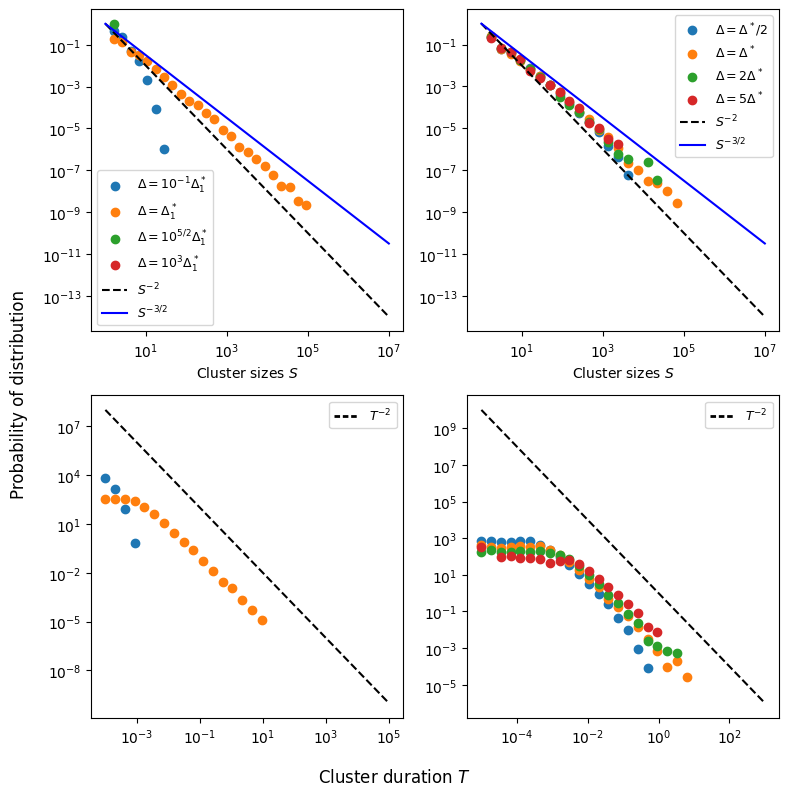

In [7]:
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))
deltas = [delta1*0.1, delta1, delta1**(5/2), delta1*10**3]
labels = ['$\Delta=10^{-1}\Delta_1^*$','$\Delta=\Delta_1^*$','$\Delta=10^{5/2}\Delta_1^*$', '$\Delta=10^3\Delta_1^*$']

fig = plt.figure(figsize=(8, 8))
axgrid = fig.add_gridspec(2,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[1,0])
ax2 = fig.add_subplot(axgrid[0,1])
ax3 = fig.add_subplot(axgrid[1,1])

for i in range(len(deltas)):
    _, cluster_sizes, cluster_times = identify_clusters_model(times, deltas[i])
   
    s_bins = np.logspace(0, 6, num = 30, base = 10)
    s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
    
    
    ax0.scatter(s_bins[:-1], s_hist[0], label=labels[i])
    ax0.set_xscale('log')
    ax0.set_yscale('log')


    t_bins = np.logspace(-4, 5, num = 30, base = 10)
    t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
    
    ax1.scatter(t_bins[:-1], t_hist[0], label=labels[i])
    ax1.set_xscale('log')
    ax1.set_yscale('log')

    
x_s = np.logspace(0, 7, num = 30, base = 10)
y_s = x_s**-2
y_s2 = x_s**(-3/2)
x_t = np.logspace(-4, 5, num = 30, base = 10)
y_t = x_t**-2

ax0.plot(x_s, y_s, label='$S^{-2}$', color='black', linestyle='--')
ax0.plot(x_s, y_s2, label='$S^{-3/2}$', color='blue')
ax1.plot(x_t, y_t, label='$T^{-2}$', color='black', linestyle='--')

mu = 10**2

times, _ = generate_series(K, n, mu)
#data2 = np.array([times, rate])
#np.save('K=10^8, n=1, mu=10^2.npy', data2)

delta2 = np.log(K)/(mu+np.sqrt(2*K*mu))
deltas2 = [delta2/2, delta2, delta2*2, delta2*5]
labels2 = ['$\Delta=\Delta^*/2$','$\Delta=\Delta^*$','$\Delta=2\Delta^*$', '$\Delta=5\Delta^*$']

for i in range(len(deltas2)):

    _, cluster_sizes, cluster_times = identify_clusters_model(times, deltas2[i])
    
    s_bins = np.logspace(0, 7, num = 30, base = 10)
    s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)

    
    ax2.scatter(s_bins[:-1], s_hist[0], label=labels2[i])
    ax2.set_xscale('log')
    ax2.set_yscale('log')

    t_bins = np.logspace(-5, 3, num = 30, base = 10)
    t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
    

    ax3.scatter(t_bins[:-1], t_hist[0], label=labels2[i])
    ax3.set_xscale('log')
    ax3.set_yscale('log')

x_t = np.logspace(-5, 3, num = 50, base = 10)
y_t = x_t**-2
ax2.plot(x_s, y_s, label='$S^{-2}$', color='black', linestyle='--')
ax2.plot(x_s, y_s2, label='$S^{-3/2}$', color='blue')
ax3.plot(x_t, y_t, label='$T^{-2}$', color='black', linestyle='--')
#ax2.legend()
#ax3.legend()



fig.supylabel('Probability of distribution')
fig.supxlabel('Cluster duration $T$')
fig.axes[0].legend(loc = 'best', fontsize = 9)
fig.axes[2].legend(loc = 'best', fontsize = 9)

fig.axes[1].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=2, linestyle='--')], labels=['$T^{-2}$'], loc = 'upper right', fontsize = 9)
fig.axes[3].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=2, linestyle='--')], labels=['$T^{-2}$'], loc = 'upper right', fontsize = 9 )

fig.axes[0].set_xlabel('Cluster sizes $S$')
fig.axes[2].set_xlabel('Cluster sizes $S$')
#fig.axes[1].set_xlabel('Cluster duration $T$')
#fig.axes[3].set_xlabel('Cluster duration $T$')

fig.tight_layout()
#fig.savefig('statistics.png')

Hacer las figuras a partir de los npy y guardar datos de las probabilidades en otros npy

- Un capítulo del TFM debería ser hablar sobre Hawkes processes en general, como generarlos, donde encontrarlos
- Algo sobre time binning (leer)
- Otro sobre criticidad, en bio o neurociencia

# Save data

In [26]:
K = 10**5
n = 1
mu = 10**-4
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))
print(delta1)

2.574310832616011


### $\Delta = 10^{-1}\Delta_1^*$

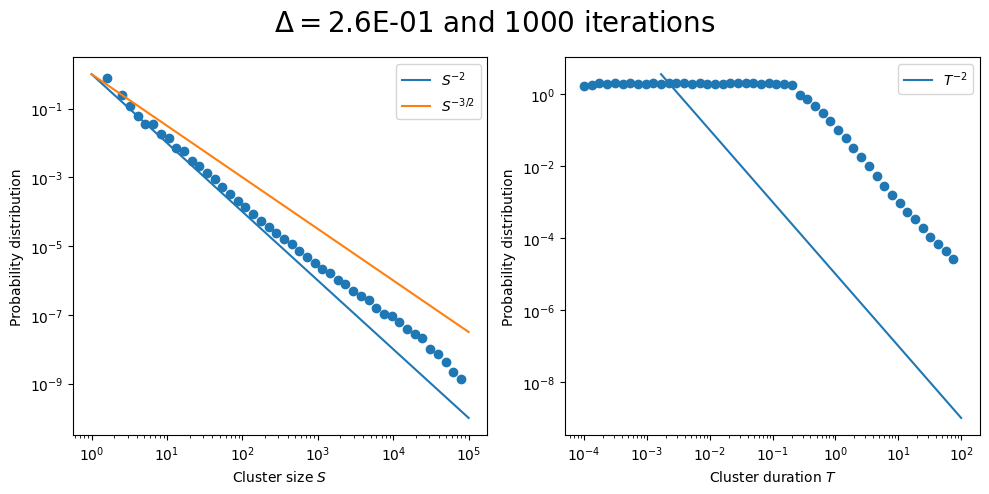

In [5]:
R = 10**3
all_cluster_sizes = []
all_cluster_times = []
delta = delta1/10

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_sizes)
np.save(f'./data/cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_times)

s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-4, 2, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\Delta=10^{-2}\Delta_1^*$

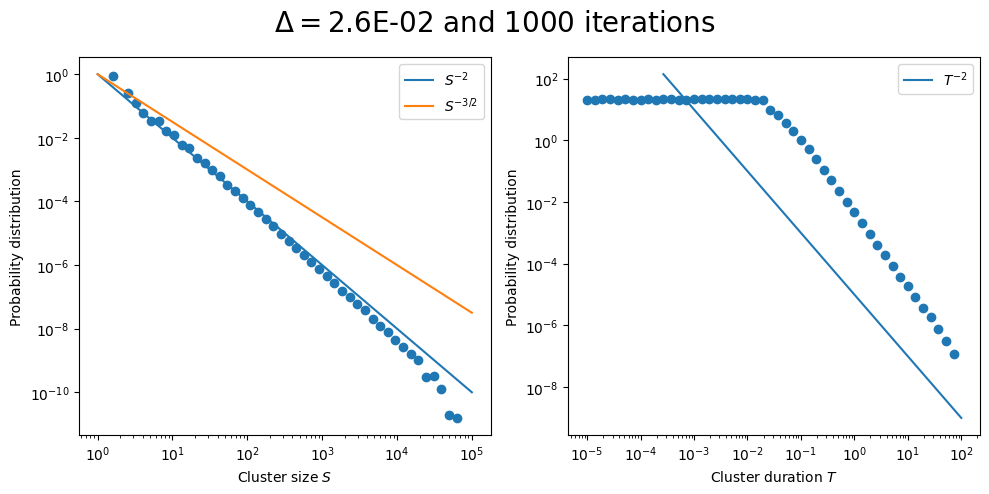

In [6]:
R = 10**3
all_cluster_sizes = []
all_cluster_times = []
delta = delta1/100

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_sizes)
np.save(f'./data/cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_times)

s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-5, 2, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\Delta=10^{-3}\Delta_1^*$

In [27]:
R = 10**3
all_cluster_sizes = []
all_cluster_times = []
delta = delta1/1000

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_sizes)
np.save(f'./data/cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_times)

s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-5, 2, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\Delta = \Delta_1^*$

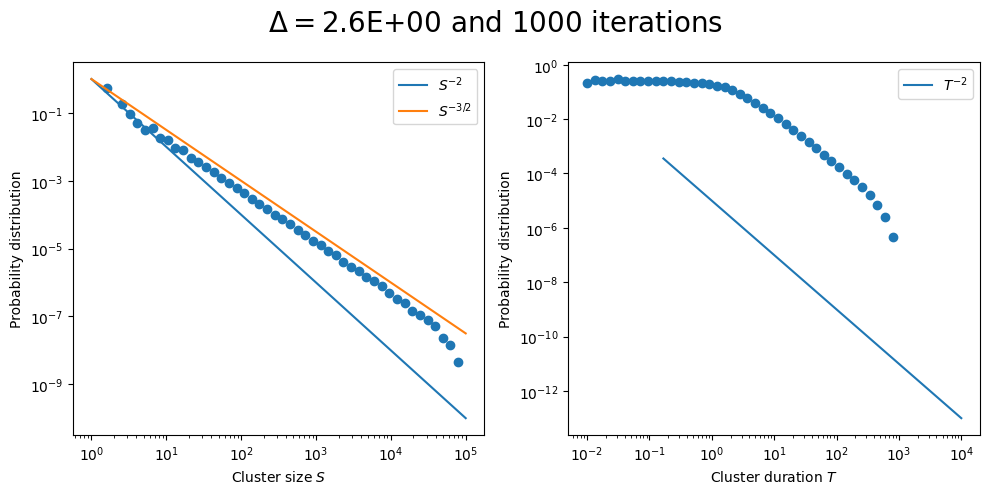

In [25]:
K = 10**5
mu = 10**-4
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))

R = 10**3
all_cluster_sizes = []
all_cluster_times = []
delta = delta1

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_sizes)
np.save(f'./data/cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_times)

s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-2, 4, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\Delta = 10^{5/2}\Delta_1^*$

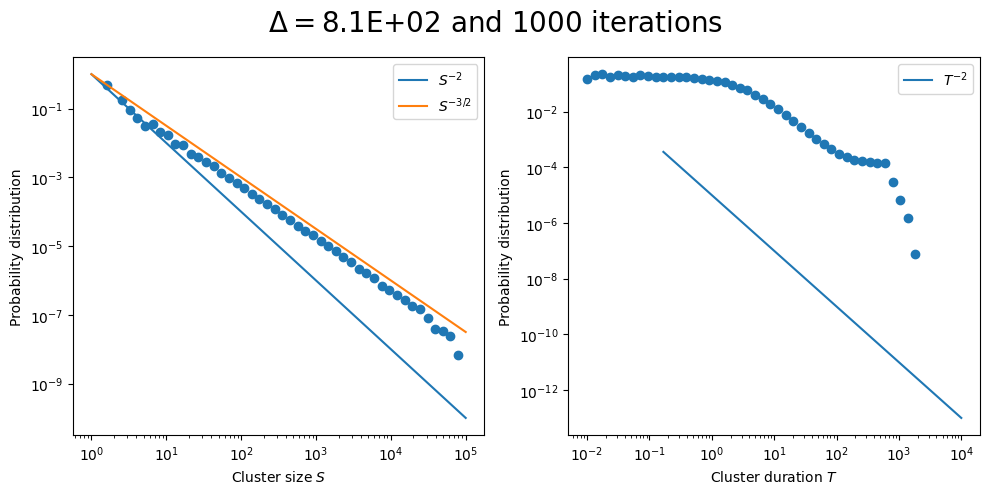

In [23]:
K = 10**5
mu = 10**-4
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))

R = 10**3
all_cluster_sizes = []
all_cluster_times = []
delta = (10**(5/2))*delta1

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_sizes)
np.save(f'./data/cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_times)

s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-2, 4, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\Delta = 10^{3}\Delta_1^*$

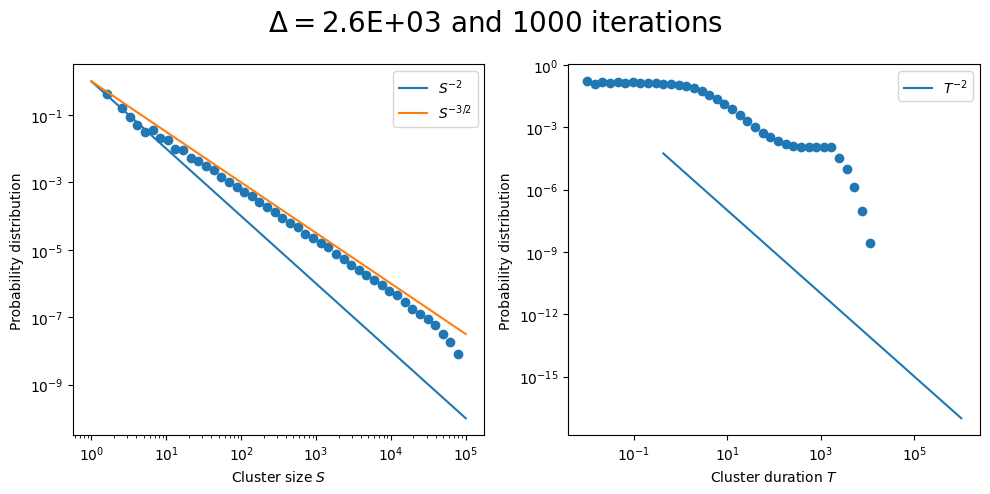

In [8]:
R = 10**3
all_cluster_sizes = []
all_cluster_times = []
delta = (10**3)*delta1

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
#np.save(f'./data/cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_sizes)
#np.save(f'./data/cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_times)

s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-2, 6, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

In [9]:
K = 10**5
n = 1
mu = 10**2
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))

### $\Delta = \Delta_1^*/2$

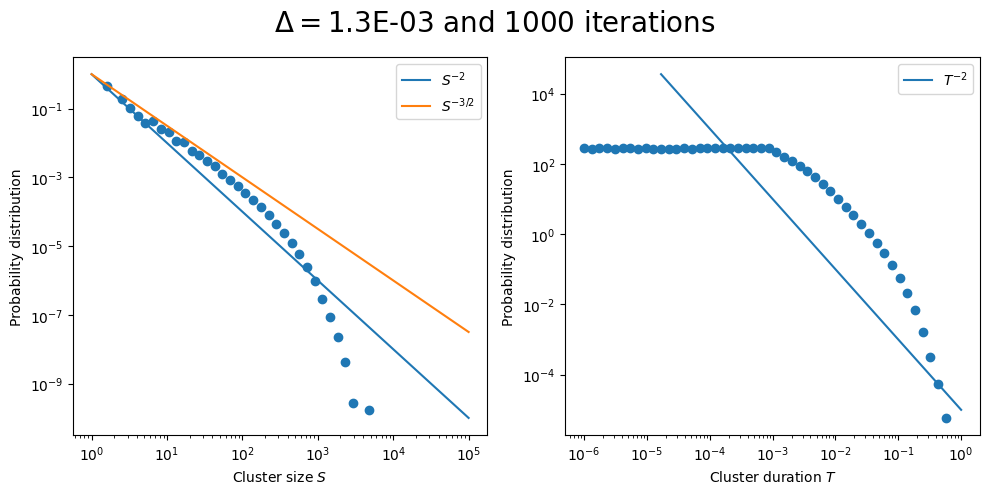

In [10]:
R = 10**3
all_cluster_sizes = []
all_cluster_times = []
delta = 0.5*delta1

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_sizes)
np.save(f'./data/cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_times)

s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-6, 0, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\Delta = \Delta_1^*$

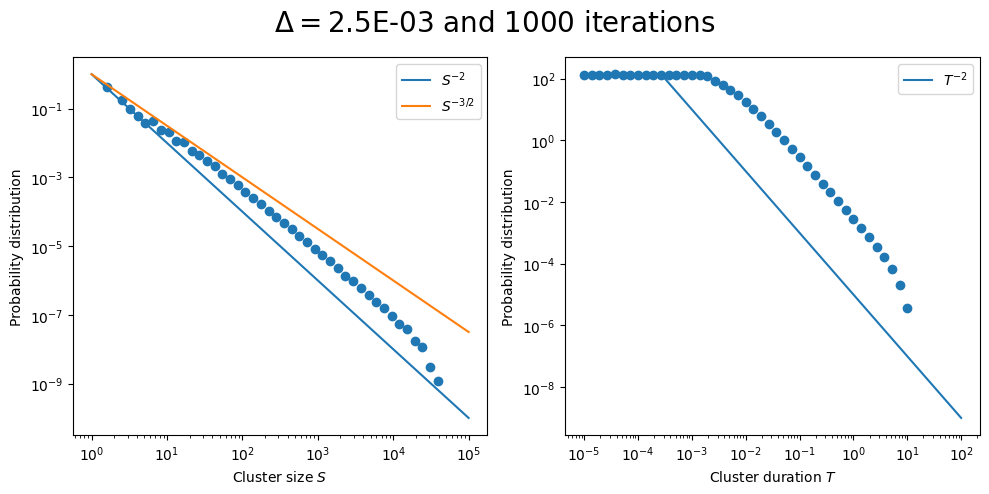

In [11]:
R = 10**3
all_cluster_sizes = []
all_cluster_times = []
delta = delta1

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_sizes)
np.save(f'./data/cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_times)

s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-5, 2, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\Delta = 2\Delta_1^*$

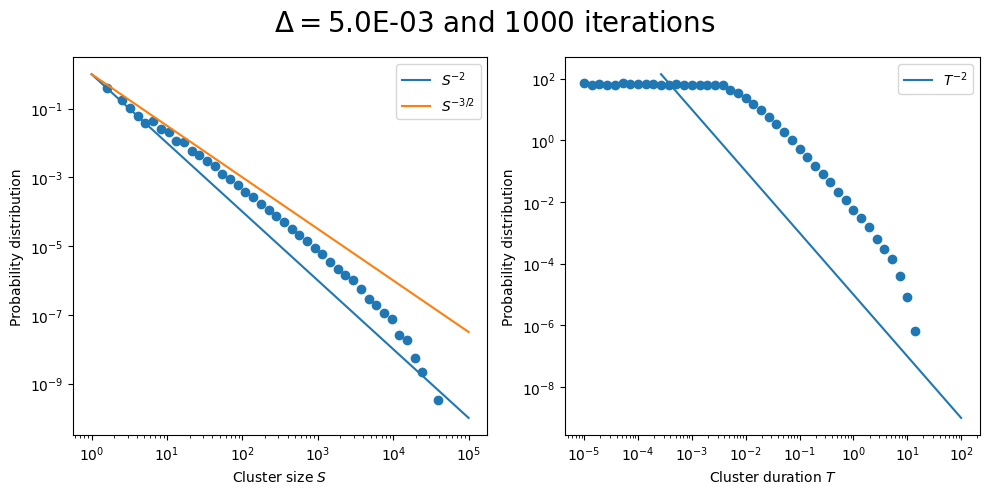

In [12]:
R = 10**3
all_cluster_sizes = []
all_cluster_times = []
delta = 2*delta1

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_sizes)
np.save(f'./data/cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_times)

s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-5, 2, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\Delta = 5\Delta_1^*$

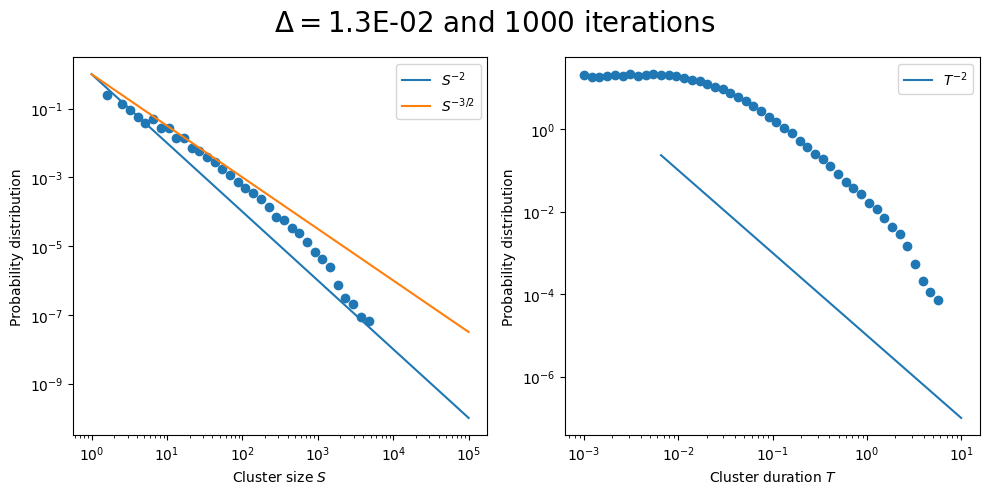

In [13]:
R = 10**3
all_cluster_sizes = []
all_cluster_times = []
delta = 5*delta1

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_sizes)
np.save(f'./data/cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}_article', all_cluster_times)

s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-3, 1, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()